In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../..')
from keras import losses, metrics
from tensorflow.keras import optimizers
import gp2
from gp2 import Runner

2023-04-25 13:21:53.708383: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-04-25 13:21:55.125429: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-04-25 13:21:55.171862: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:0f:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-25 13:21:55.174419: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-25 13:21:55.174434: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-04-2

In [3]:
help(gp2.KR2UNet2dD)

Help on class KR2UNet2dD in module gp2.gp2.classifiers.k_r2_unet2d:

class KR2UNet2dD(gp2.gp2.classifiers.base_keras_segmentation_classifier.BaseKerasSegmentationClassifier)
 |  KR2UNet2dD(input_size=(512, 512, 1), filter_num=None, n_labels=1, stack_num_down=2, stack_num_up=2, recur_num=2, activation='PReLU', output_activation='Sigmoid', batch_norm=False, pool=False, unpool=False, name='r2_unet', optimizer=None, loss=None, metric=None, verbose=False, workingdir='/tmp')
 |  
 |  Keras UNet2D
 |  
 |  Method resolution order:
 |      KR2UNet2dD
 |      gp2.gp2.classifiers.base_keras_segmentation_classifier.BaseKerasSegmentationClassifier
 |      gp2.gp2.classifiers.classifier.Classifier
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, input_size=(512, 512, 1), filter_num=None, n_labels=1, stack_num_down=2, stack_num_up=2, recur_num=2, activation='PReLU', output_activation='Sigmoid', batch_norm=False, pool=False, unpool=False, name='r2_unet', optimizer=None, 

In [4]:
R = Runner(verbose=True, 
           classifier='kr2unet2d' , 
           discriminator='cnn', #cnnplus
           filter_num=[16, 32, 64, 128],
           stack_num_down=2, 
           stack_num_up=2, 
           recur_num=1, 
           activation='ReLU', 
           output_activation='Sigmoid', 
           batch_norm=False, 
           pool=True, 
           unpool=True, 
           optimizer=None, 
           loss=None, 
           metric=None,
          )

2023-04-25 13:21:55.335036: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-25 13:21:55.592631: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:0f:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-25 13:21:55.595337: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-25 13:21:55.604811: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible 

*** GP2 R2UNet2dD ***
Working directory: /tmp/tmp0z5f50n3GP2
Verbose mode active!
{'verbose': True, 'workingdir': '/tmp/tmp0z5f50n3GP2', 'input_size': (512, 512, 1), 'filter_num': [16, 32, 64, 128], 'stack_num_down': 2, 'stack_num_up': 2, 'recur_num': 1, 'n_labels': 1, 'activation': 'ReLU', 'output_activation': 'Sigmoid', 'batch_norm': False, 'pool': True, 'unpool': True, 'name': 'r2_unet', 'optimizer': <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7ff1a01379a0>, 'loss': <function binary_crossentropy at 0x7ff1a8195b80>, 'metric': [<function binary_accuracy at 0x7ff1a803faf0>], 'model': <tensorflow.python.keras.engine.functional.Functional object at 0x7ff18c9c1250>}
Model summary:
Model: "r2_unet_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
r2_unet_input (InputLayer)      [(None, 512, 512, 1) 0                      

In [5]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/masks.npy')

In [6]:
images = images[:5000]
masks = masks[:5000]

In [7]:
images.shape

(5000, 512, 512, 1)

In [8]:
masks.shape

(5000, 512, 512, 1)

In [9]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [ ]:
R.run(images=images, masks=masks, weights=weights, runs=5)

Weights OK!
******
Loop 0


2023-04-25 13:22:03.273972: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-04-25 13:22:03.294994: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245755000 Hz


Epoch 1/100


2023-04-25 13:22:05.896884: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-04-25 13:22:06.688230: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-04-25 13:22:06.689520: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-04-25 13:22:07.343819: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-04-25 13:22:08.000100: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-04-25 13:22:08.000124: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-04-25 13:22:08.000179: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx c

4/4 [==============================] - 20s 3s/step - loss: 9.8222 - binary_accuracy: 0.2515 - val_loss: 9.6194 - val_binary_accuracy: 0.2494


2023-04-25 13:22:25.443064: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/100
4/4 [==============================] - 4s 1s/step - loss: 9.8191 - binary_accuracy: 0.2515 - val_loss: 9.6194 - val_binary_accuracy: 0.2494
Epoch 3/100
4/4 [==============================] - 4s 1s/step - loss: 9.8182 - binary_accuracy: 0.2515 - val_loss: 9.6194 - val_binary_accuracy: 0.2494
Epoch 4/100
4/4 [==============================] - 4s 1s/step - loss: 9.8209 - binary_accuracy: 0.2515 - val_loss: 9.6194 - val_binary_accuracy: 0.2494
Epoch 5/100
4/4 [==============================] - 4s 1s/step - loss: 9.8194 - binary_accuracy: 0.2515 - val_loss: 9.6194 - val_binary_accuracy: 0.2494
Model saved to: /tmp/tmp0z5f50n3GP2/r2_unet_0r2_unet_model
History saved to: /tmp/tmp0z5f50n3GP2/r2_unet_history_0.pkl
Testing the classifier...


In [11]:
R.classifier_scores

[[11.24902057647705, 0.14587022364139557],
 [11.22181224822998, 0.1459418386220932]]

In [12]:
R.discriminator_scores

[[0.0, 1.0], [0.0, 1.0]]

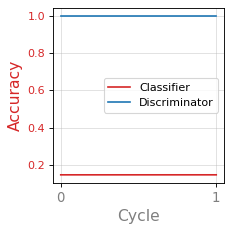

In [13]:
R.plot()

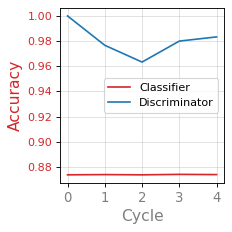

In [13]:
R.plot()